<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/SW_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# See avialable plot styles
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
# "fast" is actually the default style, so you don't necessarily have to set it.
# specify fast anyway
plt.style.use('fast')

# Pandas visualization
Titanic Information

In [8]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
# url = '/Users/austinlasseter/atelier/lambda/dspt4/scraps/pandas_visualization/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [9]:
#see Pclass values
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [10]:
# cabin class is a categorical variable, replace with strings to look pretty
# it can be displayed using either number or string values.
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2: 'second', 3: 'third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
505,0,3,male,20.0,7.8542,Southampton,third
670,1,1,female,30.0,31.0000,Cherbourg,first
346,0,1,male,50.0,55.9000,Southampton,first
551,0,3,male,44.0,8.0500,Southampton,third
422,0,3,female,30.0,8.6625,Southampton,third


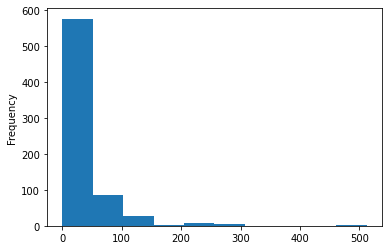

In [11]:
# Fare is a continuous variable, so we can display it with a histogram.
titanic['Fare'].plot(kind='hist');

In [12]:
print(titanic.shape)

(712, 7)


In [13]:
# Outliers were removed
titanicx = titanic[titanic['Fare']<500]
print(titanicx.shape)

titanicz = titanic[titanic['Fare']<200]
titanicz.shape

(709, 7)


(694, 7)

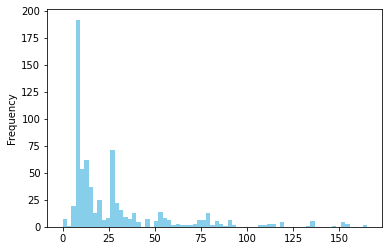

In [14]:
#histograms with out outliers
titanicz['Fare'].plot(kind='hist', color = 'skyblue', bins=70);

In [15]:
# statistical data, compare with and without outliers
print(titanic['Fare'].describe())
print('')
print(titanicx['Fare'].describe())
print('')
titanicz['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64



count    694.000000
mean      28.061983
std       30.353275
min        0.000000
25%        8.050000
50%       14.500000
75%       31.206250
max      164.866700
Name: Fare, dtype: float64

In [16]:
# Binning can be used to change a continuous variable to catagorical
# 18 of 712 fares were over $200, that is about 2.5%
farelabels= ['vlow','low', 'medium', 'high', 'vhigh']
titanic['fare_groups']= pd.cut(titanic['Fare'], bins=[0,8,15,31,200, 600], labels= farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,vlow
1,71.2833,high
2,7.9250,vlow
3,53.1000,high
4,8.0500,low


In [17]:
#verify results contain all fares
fare_results = titanic['fare_groups'].value_counts().sort_index()
fare_results

vlow      154
low       189
medium    170
high      174
vhigh      18
Name: fare_groups, dtype: int64

'\nIncluding the 5th catagory makes more sense to me\nthan leaving out the outliers entirely, but the\nbin from $31-$200 seems like a very broad range\ncompared to the two lower ranges. To me it would\nalmost be better to add a 6th column with fares\n$31-$100 & $100-$200. However, is there a reason\nto split out be quartiles?\n'

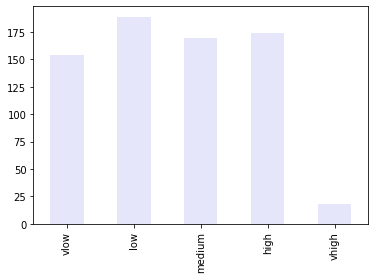

In [18]:
#plot of fares
fare_results.plot(kind='bar', color='lavender');
"""
Including the 5th catagory makes more sense to me
than leaving out the outliers entirely, but the
bin from $31-$200 seems like a very broad range
compared to the two lower ranges. To me it would
almost be better to add a 6th column with fares
$31-$100 & $100-$200. However, is there a reason
to split out be quartiles?
"""


In [40]:
#look at number of fares $100-$199; 30 fares
# 4.2%
titanicb = titanic[titanic['Fare']<100]
titanicb.shape

(664, 8)

#Moving on to the meat of the assignment

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [1]:
#Every guest John Stewart ever had on 'The Daily Show'




from google.colab import drive
drive.mount('/content/drive')

# #gives a new name filename.csv
# # df=pd.read_csv('filename.csv')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# set up table style
plt.style.use('fivethirtyeight')


In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png?w=575'
example = Image(url=url, width=400)

display(example)

In [34]:
#make fake data, one line
fake_acm =[90,75,74,63,59,42,41,40,25,22,21,33,48,46,49]
fake = pd.Series(fake_acm,index=range(1999,2014))
fake

1999    90
2000    75
2001    74
2002    63
2003    59
2004    42
2005    41
2006    40
2007    25
2008    22
2009    21
2010    33
2011    48
2012    46
2013    49
dtype: int64

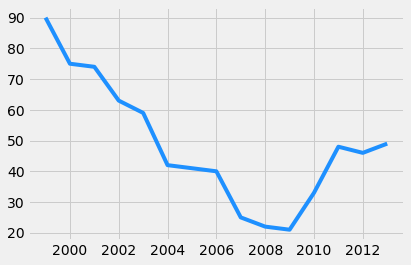

In [37]:
# display as a line graph
fake.plot.line(color='dodgerblue');

In [39]:
display(example)

In [52]:
#make fake data, other two lines
# fake_acm=[90,75,74,63,59,42,41,40,25,22,21,33,48,46,49]
fake_m =  [9,14,26,25,26,30,28,30,49,40,35,36,37,36,24]
fake_gp =[1,11,5,3,12,24,20,22,21,22,23,22,13,14,20]
fake2 = pd.Series(fake_m,index=range(1999,2014))
print(fake2)
print("")
fake3 = pd.Series(fake_gp,index=range(1999,2014))
fake3

1999     9
2000    14
2001    26
2002    25
2003    26
2004    30
2005    28
2006    30
2007    49
2008    40
2009    35
2010    36
2011    37
2012    36
2013    24
dtype: int64



1999     1
2000    11
2001     5
2002     3
2003    12
2004    24
2005    20
2006    22
2007    21
2008    22
2009    23
2010    22
2011    13
2012    14
2013    20
dtype: int64

In [42]:
display(example)

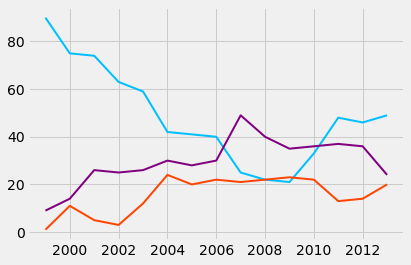

In [54]:
# display as a line graph, all three
fake.plot.line(color='deepskyblue', lw=2)
fake2.plot.line(color= 'purple', lw=2)
fake3.plot.line(color='orangered',lw=2);


In [109]:
display(example)

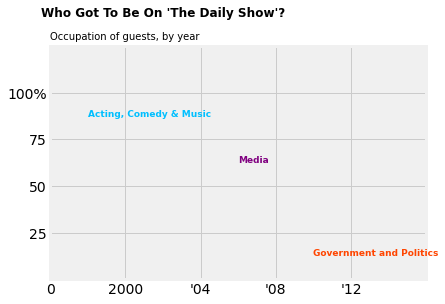

In [121]:
#try empty canvas to get labels & tick marks
#empty canvas
fig, ax =plt.subplots()
fig.patch.set(facecolor='white')

#titles
ax.set_title("Who Got To Be On 'The Daily Show'?", fontsize=12, x=.3, y=1.1, fontweight='bold')
ax.text(s="Occupation of guests, by year", fontsize=10, x=0, y=1.03);
ax.text(.1,.7,s="Acting, Comedy & Music", fontsize=9, fontweight='bold', color = "deepskyblue");
ax.text(.5,.5,s="Media", fontsize=9, fontweight='bold', color = "purple");
ax.text(.7,.1,s="Government and Politics", fontsize=9, fontweight='bold', color = "orangered");

#axes labels not needed
#tick marks and grid
ax.set_xticklabels([0,2000,"'04","'08","'12"])

ax.set_yticklabels(["",25, 50,75,"100%"]);

In [122]:
# unzip using bash
! unzip '/content/drive/My Drive/daily-show-guests.zip'



Archive:  /content/drive/My Drive/daily-show-guests.zip
replace daily-show-guests/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace daily-show-guests/daily_show_guests.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [138]:
url = 'daily-show-guests/daily_show_guests.csv'
guests=pd.read_csv(url)
guests.sample(6)

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
1395,2007,comedian,6/11/07,Comedy,David Steinberg
1748,2009,screenwriter,7/30/09,Media,Judd Apatow
2513,2014,foreign policy analyst,3/6/14,Academic,Kimberly Marten
718,2003,stand-up comedian,3/11/03,Comedy,Colin Quinn
630,2002,actor,8/14/02,Acting,Kevin Nealon
2312,2013,businessman,12/17/13,Business,Erik Prince


In [139]:
guests["Group"].value_counts()

Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
Name: Group, dtype: int64

In [140]:
#narrow down to catagories on graph
guests['Group_Short']='Other'
guests[['Group','Group_Short']].sample(15)


,Group,Group_Short
1976,Acting,Other
258,Acting,Other
1494,Comedy,Other
413,Media,Other
868,Comedy,Other
644,Acting,Other
245,Musician,Other
2349,Acting,Other
1760,Acting,Other
668,Government,Other


In [141]:

"""
Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
"""

#Pick relevant labels
guests.loc[guests['Group'] == 'Media','Group_Short'] = 'Media'
guests.loc[guests['Group'] == 'media','Group_Short'] = 'Media'
guests.loc[guests['Group'] == 'Acting','Group_Short'] = 'ACM'
guests.loc[guests['Group'] == 'Comedy','Group_Short'] = 'ACM'
guests.loc[guests['Group'] == 'Musician','Group_Short'] = 'ACM'
guests.loc[guests['Group'] == 'Politician','Group_Short'] = 'GaP'
guests.loc[guests['Group'] == 'Government','Group_Short'] = 'GaP'
guests.loc[guests['Group'] == 'Political Aide','Group_Short'] = 'GaP'
guests[['Group_Short', 'Group']].sample(10)


,Group_Short,Group
2474,Other,Misc
1799,Media,Media
1611,Media,Media
511,ACM,Comedy
2522,Media,Media
319,Media,Media
506,ACM,Acting
268,ACM,Acting
587,ACM,Musician
2426,Media,Media


In [142]:
guests["Group_Short"].value_counts()

ACM      1203
Media     756
GaP       384
Other     350
Name: Group_Short, dtype: int64

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here